# AMATH 342 HW 1

<p> <b> Avinash Joshi </b> </p>
<p> <b> AMATH 342 Wi 22 </b> </p>
<p> <b> Prof. Shea-Brown </b> </p>
<p> <b> 10 January 2022 </b> </p>
    

## Section I:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.dpi']=400
import timeit

#### T1

In [2]:
T1 = np.array([[[1,2,3],[1,2,3],[1,2,3],[1,2,3]],[[22,1,1],[22,1,1],[1,1,1],[1,1,1]]])
T1

array([[[ 1,  2,  3],
        [ 1,  2,  3],
        [ 1,  2,  3],
        [ 1,  2,  3]],

       [[22,  1,  1],
        [22,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]]])

In [3]:
T1.shape

(2, 4, 3)

<p> The colon operator [:], in the form #<sub>1</sub> : #<sub>2</sub>, starts slicing at the  index #<sub>1</sub> and ends before index #<sub>2</sub>.

In [4]:
T1[1:,:2,0:1]

array([[[22],
        [22]]])

#### T2

In [5]:
ts = np.arange(3,300,3)
ts

array([  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,  39,
        42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,  78,
        81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114, 117,
       120, 123, 126, 129, 132, 135, 138, 141, 144, 147, 150, 153, 156,
       159, 162, 165, 168, 171, 174, 177, 180, 183, 186, 189, 192, 195,
       198, 201, 204, 207, 210, 213, 216, 219, 222, 225, 228, 231, 234,
       237, 240, 243, 246, 249, 252, 255, 258, 261, 264, 267, 270, 273,
       276, 279, 282, 285, 288, 291, 294, 297])

In [6]:
x = np.arange(10000001,dtype=np.float64)

start_time = timeit.default_timer()
x1 = x + x ** 2 + x ** 3
elapsed = timeit.default_timer() - start_time
elapsed

0.21527449999999249

In [7]:
x2 = np.zeros(10000001,dtype=np.float64)

start_time = timeit.default_timer()
for i in range(len(x)):
    x2[i] = (x[i]) + (x[i]) ** 2 + (x[i]) ** 3

elapsed = timeit.default_timer() - start_time
elapsed

6.304142399999989

Computing $x + x^{2} + x^{3}$ by using vectorized computation, x1, was faster.

#### T3

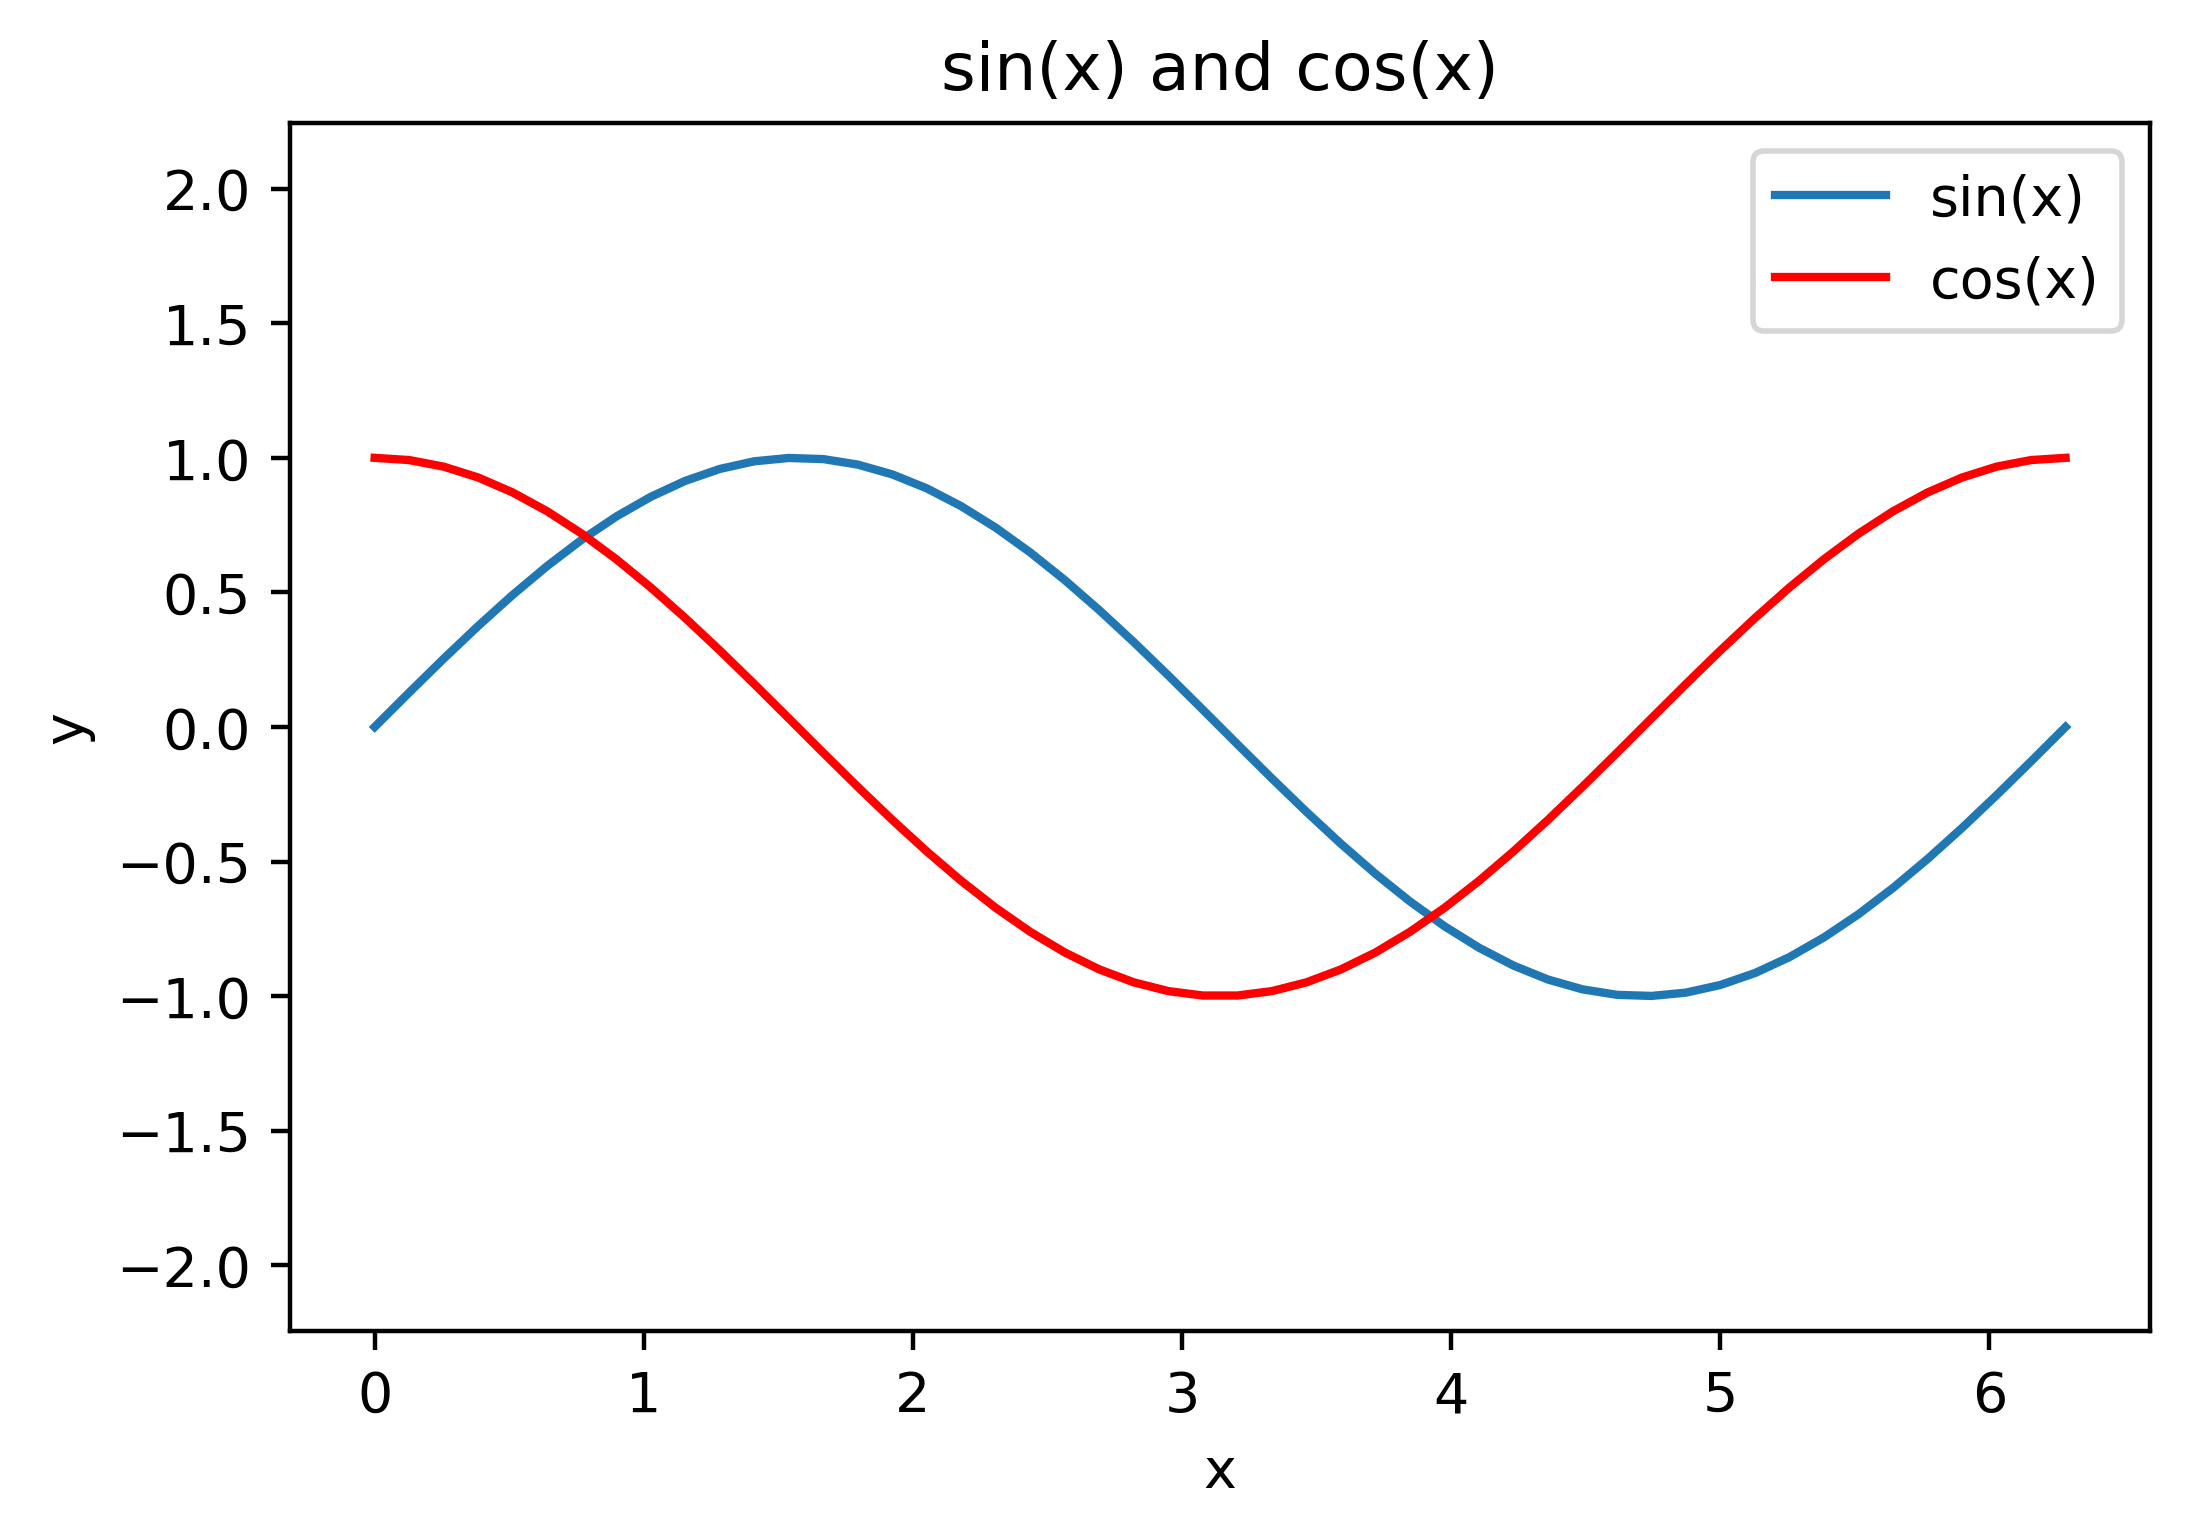

In [8]:
x_array=np.linspace(0,2*np.pi,50)
y_array=np.sin(x_array)
ycos = np.cos(x_array)

fig, ax = plt.subplots()
ax.plot(x_array,y_array, label='sin(x)')
ax.plot(x_array,ycos,'r', label = 'cos(x)')
plt.xlabel('x')
plt.ylabel('y')
ax.axis('equal')
ax.legend()
plt.title('sin(x) and cos(x)')
plt.show()

## Section II:

#### 1:

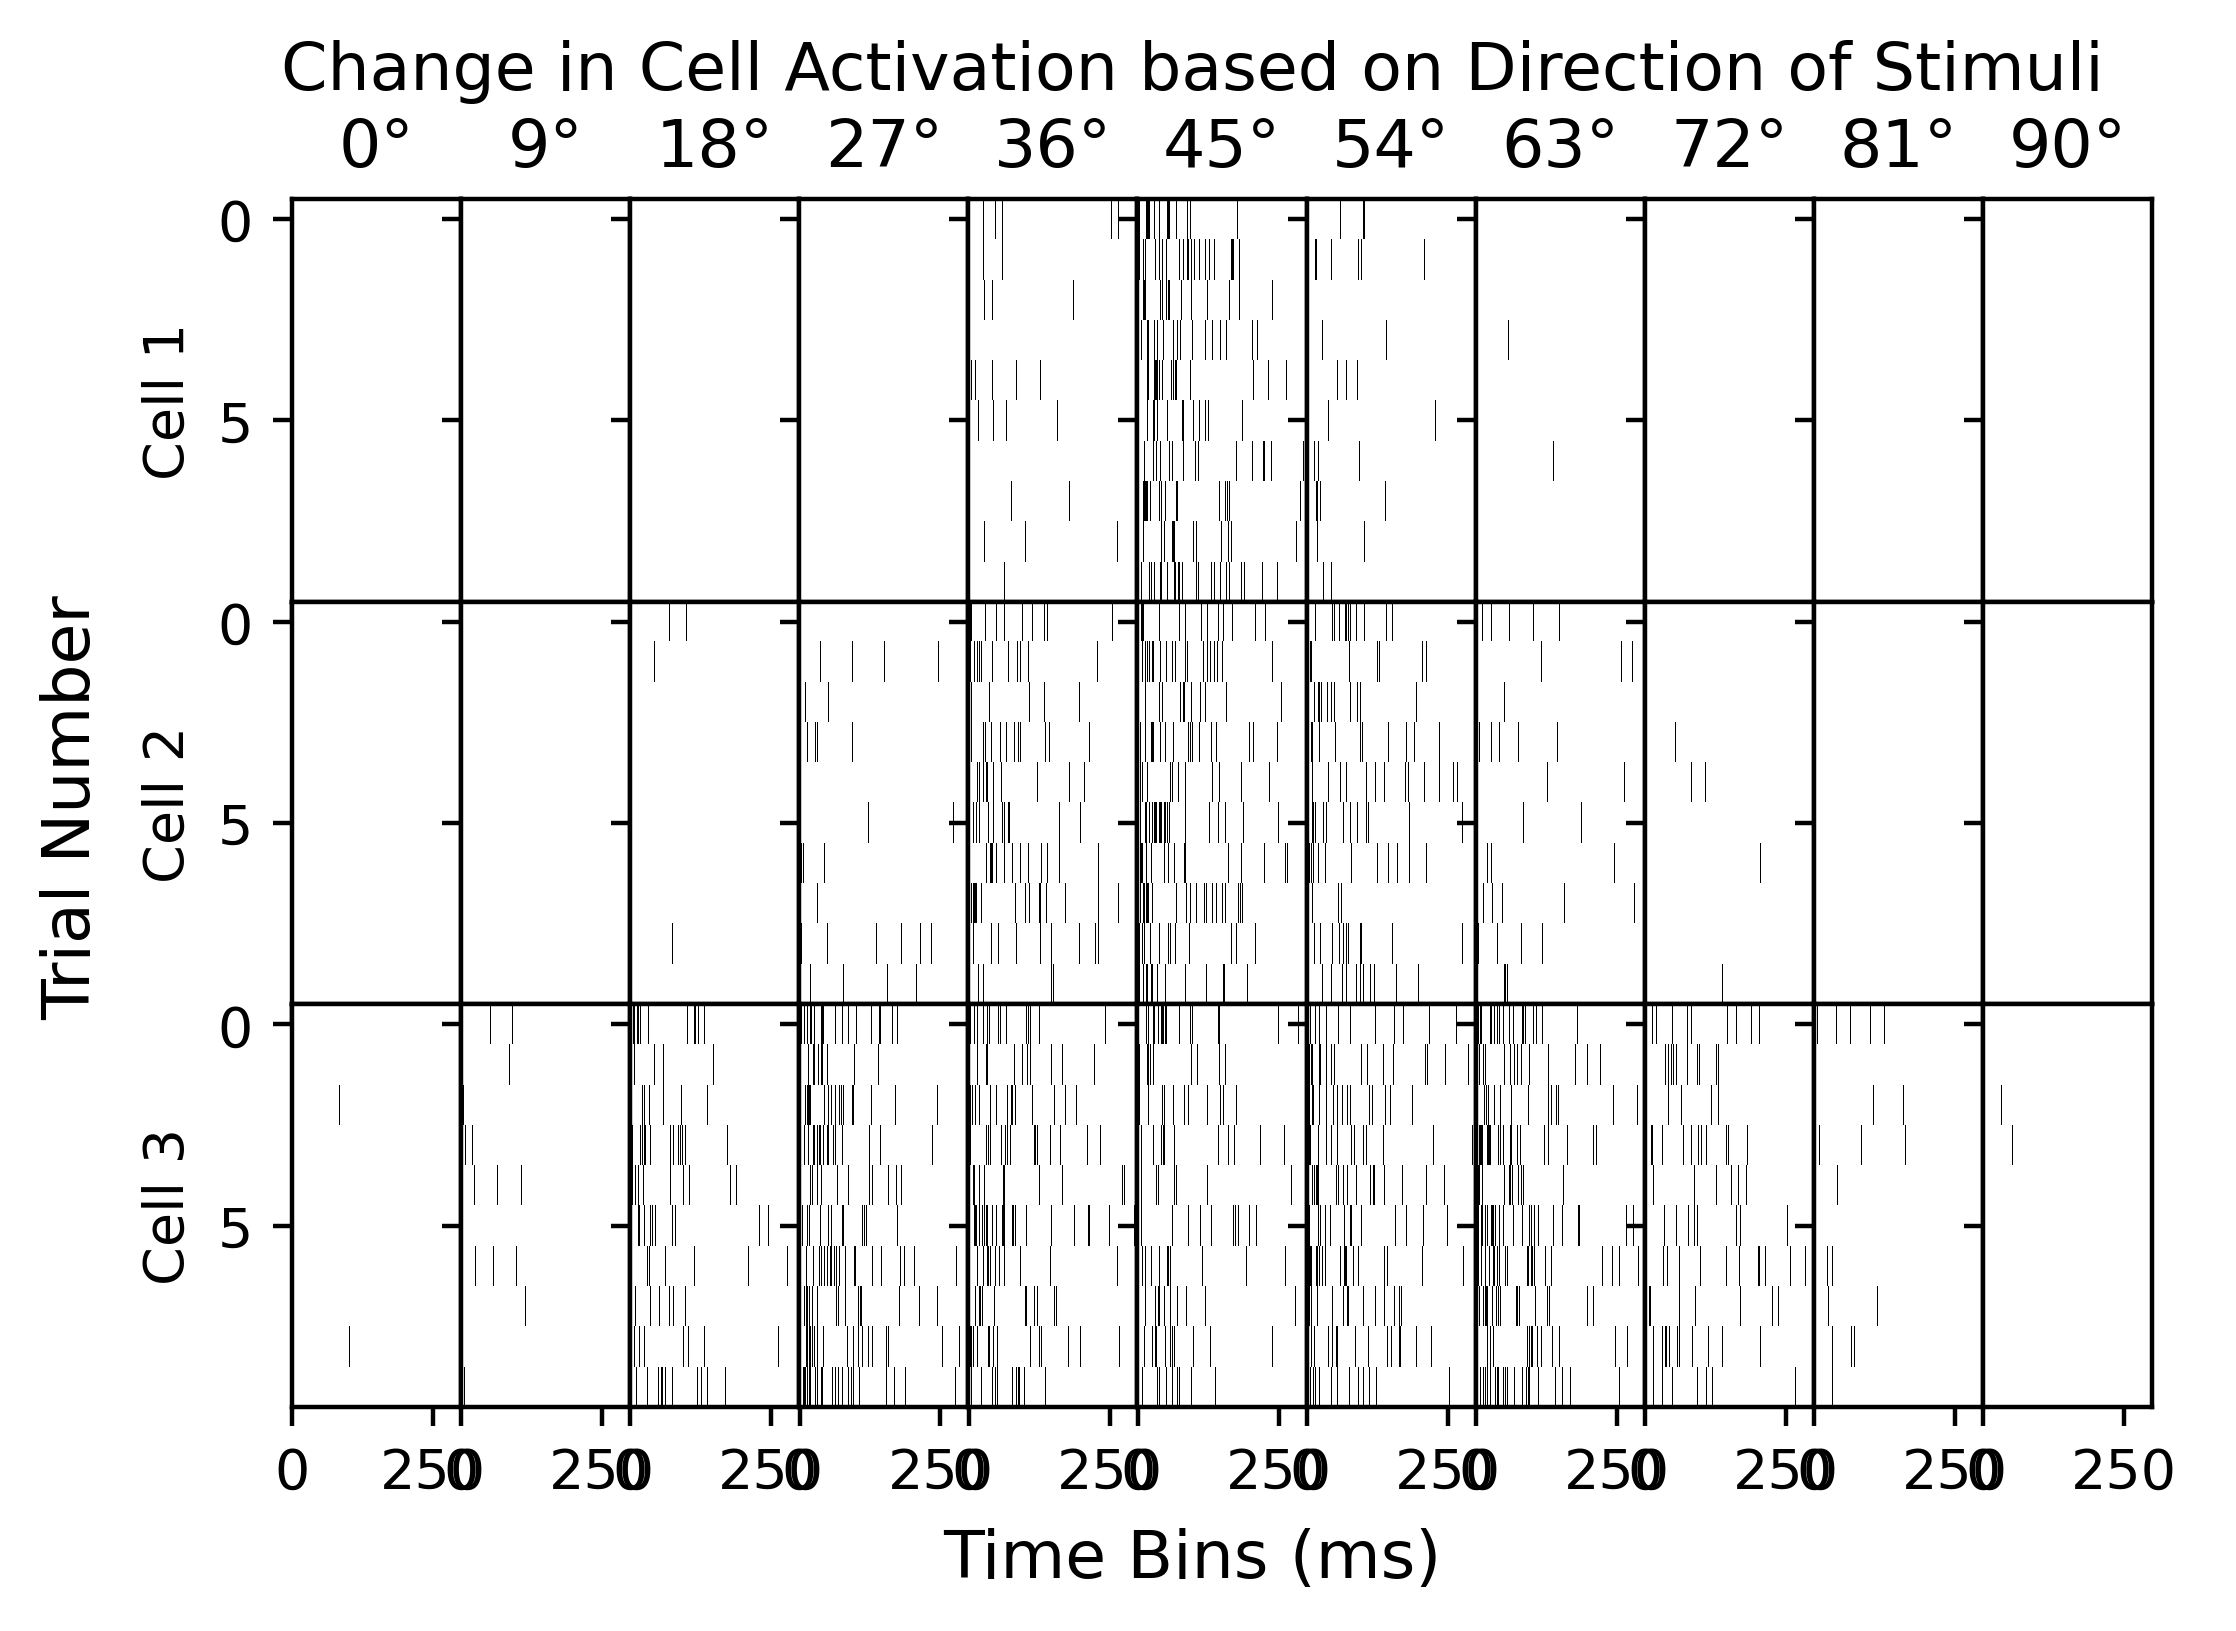

In [9]:
def gaussian(mu,sigma, x):   
    maxrate = 300 # max firing rate
    f = maxrate*np.exp(-0.5*((x-mu)/sigma)**2)
    return f

def cockroach_tuning(stim_dir, cell_num):
    
    if cell_num == 1:
        mu = 45
        sigma = 5
        f = gaussian(mu, sigma, stim_dir)
    elif cell_num == 2:
        mu = 45
        sigma = 10
        f = gaussian(mu, sigma, stim_dir) 
    else:
        mu = 30
        sigma = 10
        f1 = gaussian(mu, sigma, stim_dir)
        mu = 60
        f2 = gaussian(mu, sigma, stim_dir)
        f = (f1 + f2)

    return f


ntrials = 10  # number of trials
nmsec = 300
dirnumb = 11  # number of directions
dangle = 9  # number of degrees change per direction
## To increase graph resolution increase dirnumb and decrease dangle
cells = 3

fig = plt.figure() # setting up Raster
gs = fig.add_gridspec(3, dirnumb, wspace = 0, hspace=0)
ax = gs.subplots(sharex=True, sharey= True)
fig.add_subplot( frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.suptitle('Change in Cell Activation based on Direction of Stimuli')
fig.supxlabel('Time Bins (ms)')
fig.supylabel('Trial Number')



spiketrain = np.zeros((cells, dirnumb, ntrials, nmsec))     # set up output data
avgspikes = np.zeros((cells, dirnumb, ntrials))
trmean = np.zeros((cells, dirnumb))
trstd = np.zeros((cells, dirnumb))

for n in range(cells): # cell loop
    for z in range(dirnumb): # dir loop
        stimDir = (z)*dangle  # direction ticker
        cell_num = n+1  # cell number ticker
        
        times=np.arange(nmsec) # array of time points (1 msec apart)
    
        rate = cockroach_tuning(stimDir, cell_num)  # returns rate, in Hz. 
        #print(rate)
        tau = 100      # adaptation time constant in msec
        delta_t=0.001  #time bin, in seconds (1 msec)
        ratelist = rate*np.exp(-times/tau)  # list of adapting rates 
        

        rng = np.random.default_rng()

        for j in np.arange(ntrials): # trial loop    
            for i in np.arange(nmsec): # bin loop
                spiketrain[n,z,j,i] = np.round(rng.uniform(0,1,1) + ratelist[i]*delta_t -1/2)
            avgspikes[n,z,j] = np.sum(spiketrain[n,z,j,:])/nmsec/delta_t  # avg spike rate
        
        # raster input
        ax[n,z].imshow(spiketrain[n,z,:,:], aspect = 'auto',  interpolation='nearest', cmap='gray_r')
        if n == 0:
            ax[n,z].set_title('{}°'.format(stimDir))
        if z == 0:
            ax[n,z].set_ylabel('Cell {}'.format(cell_num))
        
        trmean[n,z] = np.mean(avgspikes[n,z,:])
        trstd[n,z] = np.std(avgspikes[n,z,:])
        

<p> For Cell 1, the cell only repsonds in a narrow band of stimulation, in these limited trials it was only around 45°. Beyond 30° and 60°, the cell did not experience sufficient stimulation to reach the activation threshold. </p>
<p> For Cell 2, the cell responds in a large band of stimulation, between about 30° - 60°, indicating a greater range, compared with Cell 1, which it could sense and respond to the stimuli direction. </p>
<p>For Cell 3, the cell responds in the largest range of stimulation, between 10° - 75° though its most concentrated, unlike cells 1 and 2, around 30° and 60° with a its third most concentrated region of 45°. </p>

In [10]:
print('Trial Averaged Spike Rate:')
print(avgspikes), print(), print(), print()
print('Mean of trial-normalized spiking rate for each cell and direction:')
print(trmean), print()
print('Standard deviation of trial-normalized spiking rate for each cell and direction:')
print(trstd)

Trial Averaged Spike Rate:
[[[  0.           0.           0.           0.           0.
     0.           0.           0.           0.           0.        ]
  [  0.           0.           0.           0.           0.
     0.           0.           0.           0.           0.        ]
  [  0.           0.           0.           0.           0.
     0.           0.           0.           0.           0.        ]
  [  0.           0.           0.           0.           0.
     0.           0.           0.           0.           0.        ]
  [ 33.33333333  16.66666667  23.33333333  13.33333333  20.
    23.33333333  10.          16.66666667  16.66666667  10.        ]
  [110.         116.66666667  76.66666667  80.         110.
    96.66666667 110.          83.33333333  83.33333333 116.66666667]
  [ 20.          26.66666667   6.66666667  13.33333333  16.66666667
    13.33333333  16.66666667  16.66666667  23.33333333  23.33333333]
  [  0.           0.           0.           3.33333333   0.
  

<p> There are enough trials to draw meaningful conclusions as there are only a few entries where subtracting the standard deviation from the mean results in a value close to 0, effectively killing the data, leaving the rest of the data not seriously affected. </p>
    
<p> The general shape of the data is unchanged regardless of the variation, even though some variation is as high as 15 or 20 spikes per second as it is coupled with an equally frequent spiking mean (typically 100 spikes per second). </p>

#### 2:

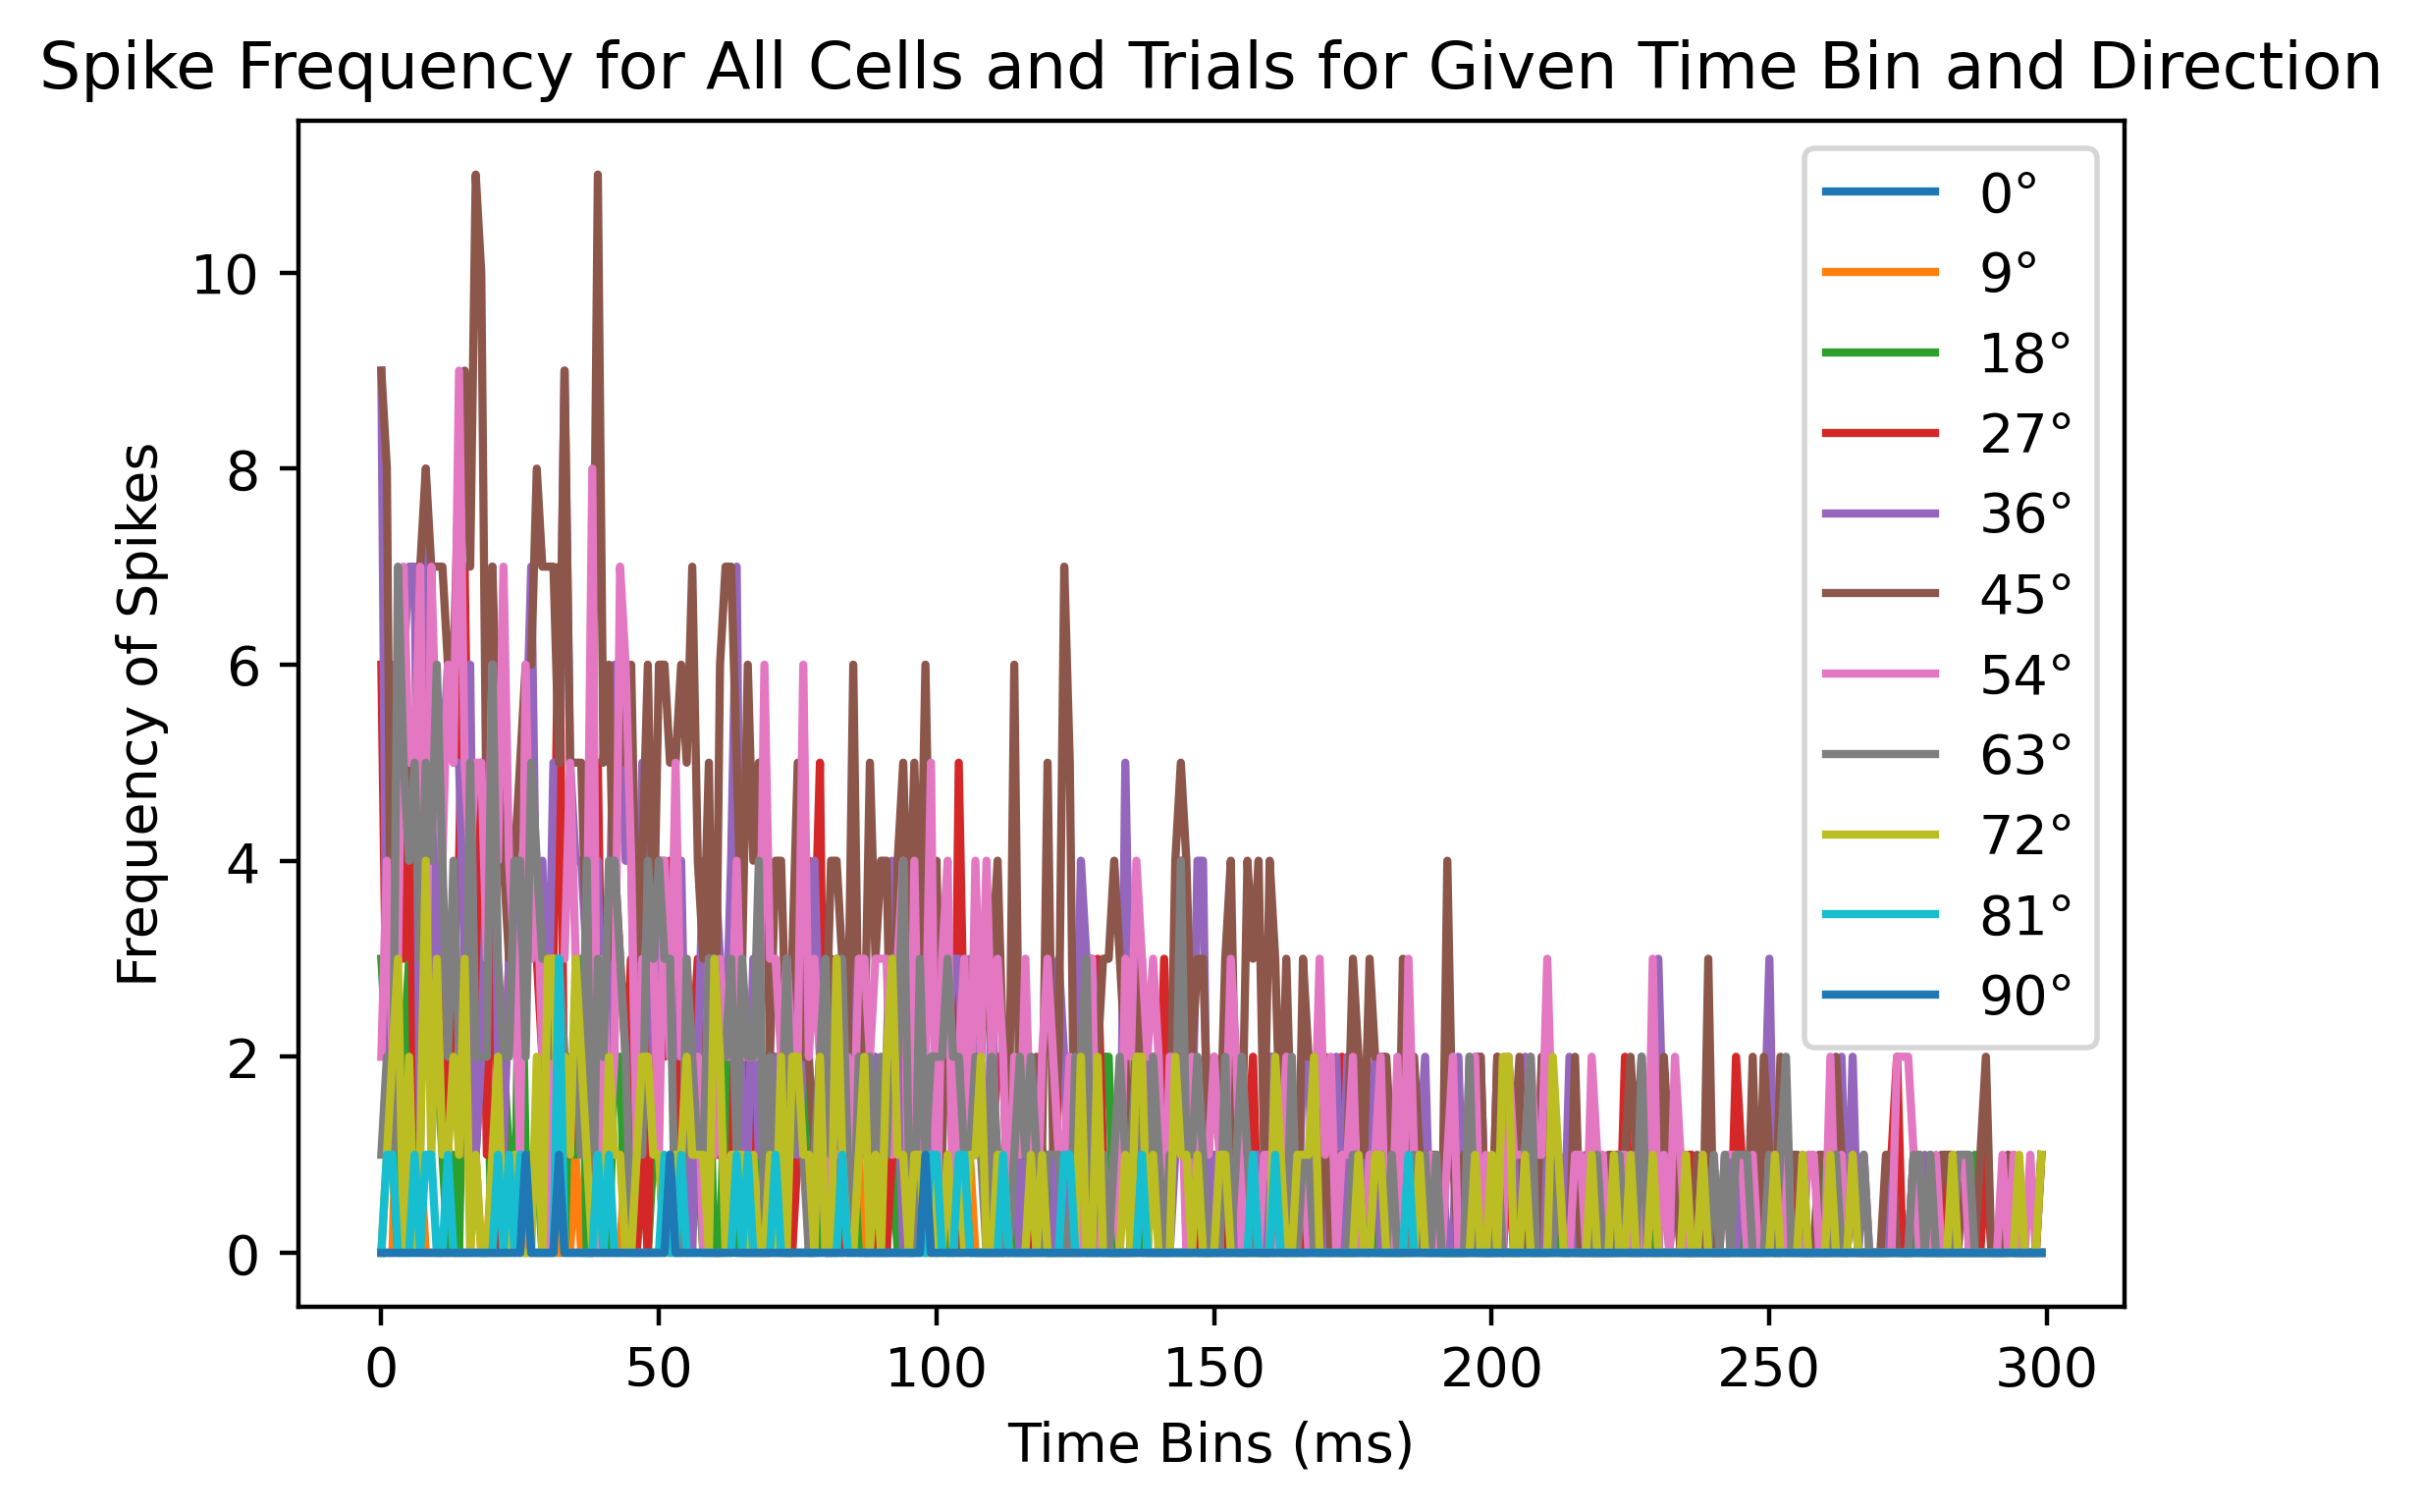

In [11]:
spikedensity = np.zeros((dirnumb, nmsec)) # squishing all spikes of one bin into one 'megatrial'

for z in range(dirnumb):  # direction loop
    stimDir = (z)*dangle
    for i in np.arange(nmsec):
        spikedensity[z, i] = np.sum(spiketrain[:,z,:,i])
    plt.plot(times,spikedensity[z,:], '-',label = '{}°'.format(stimDir))
    plt.legend()
    plt.xlabel('Time Bins (ms)')
    plt.ylabel('Frequency of Spikes')
    plt.title('Spike Frequency for All Cells and Trials for Given Time Bin and Direction')

For all directions of stimuli, the rate at which the cells spiked decreased after an initially higher rate of spiking, especially for the 45° direction of stimuli. This is a prime example of neuronal adaptation, where a cell begins to adapt to the continuous, incoming stimulus by decreasing its spiking rate.

#### 3:

Text(0.5, 0.98, 'Cell Tuning Curves for Stimulus Angle')

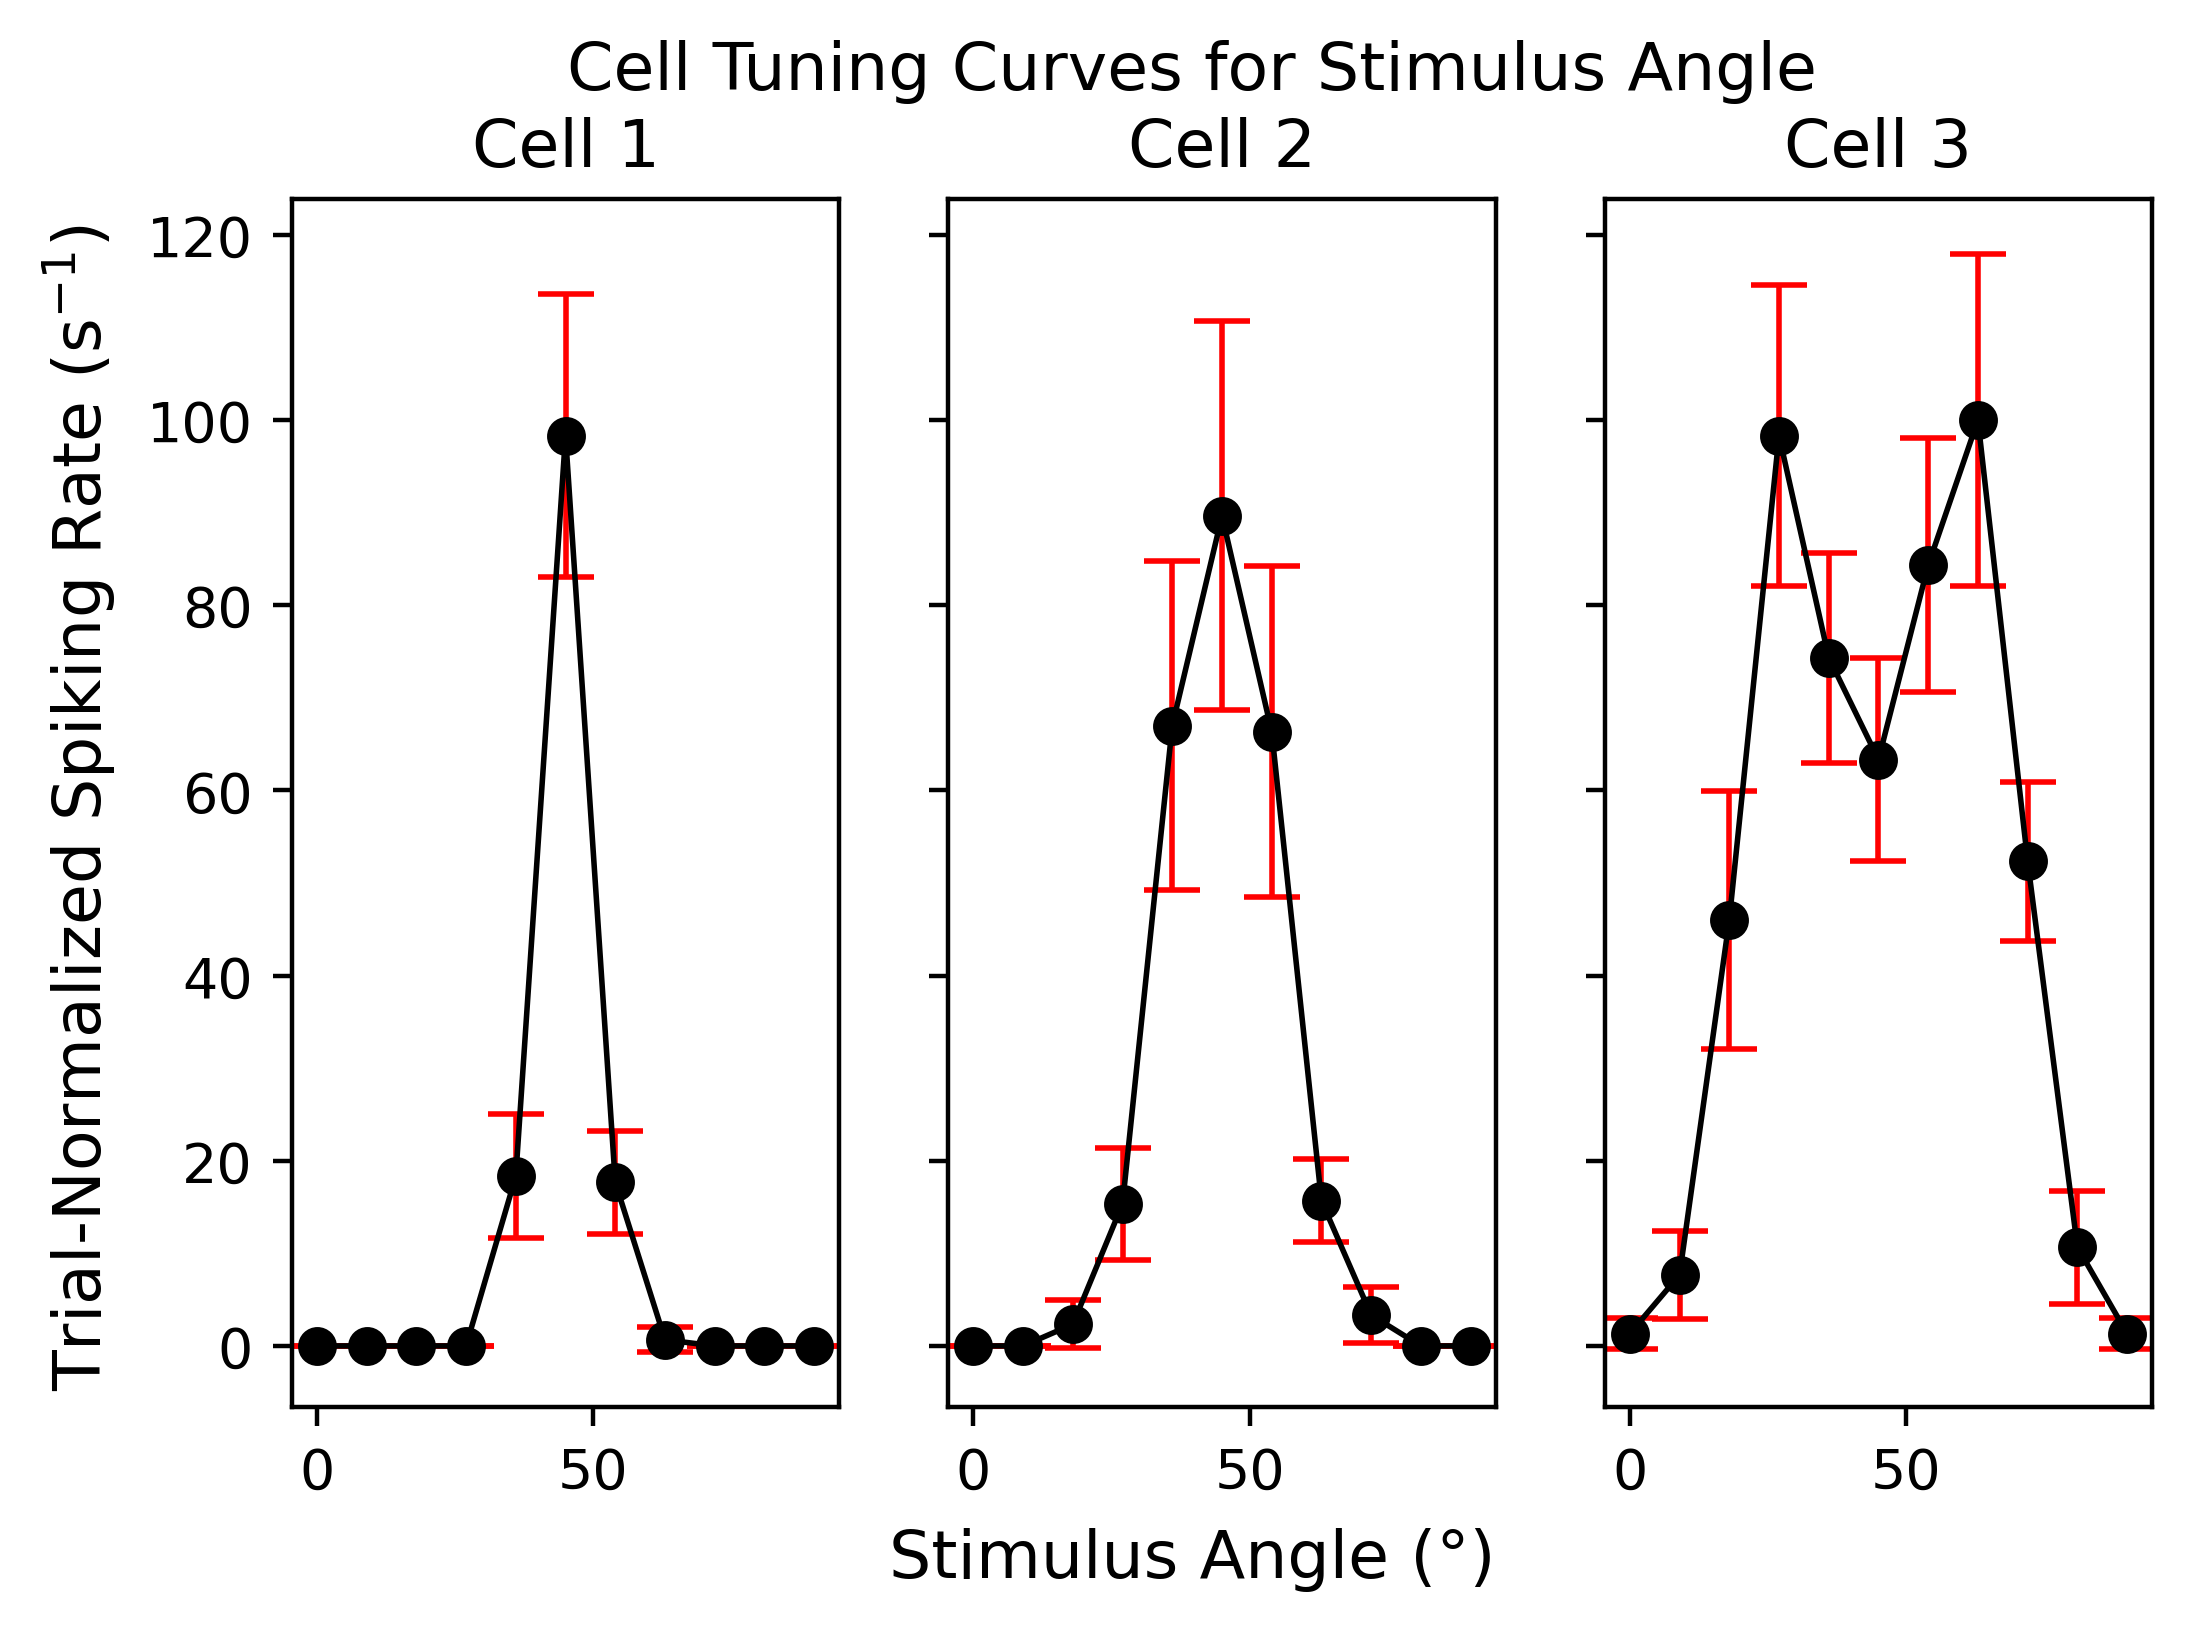

In [12]:
fig, ax = plt.subplots(1,3, sharex=True, sharey= True)
ax[0].errorbar(np.arange(0, dirnumb * dangle,dangle), trmean[0,:], trstd[0,:],lw=1, fmt='k-o', capsize =5, ecolor = 'r' )
ax[0].set_title('Cell 1')
ax[1].errorbar(np.arange(0, dirnumb * dangle,dangle), trmean[1,:], trstd[1,:],lw=1, fmt='k-o',  capsize =5, ecolor = 'r')
ax[1].set_title('Cell 2')
ax[2].errorbar(np.arange(0, dirnumb * dangle,dangle), trmean[2,:], trstd[2,:],lw=1, fmt='k-o',  capsize =5, ecolor = 'r')
ax[2].set_title('Cell 3')
fig.supxlabel('Stimulus Angle (°)')
fig.supylabel('Trial-Normalized Spiking Rate (s$^{-1}$)')
fig.suptitle('Cell Tuning Curves for Stimulus Angle')

<p> Cells 1 and 2 had their only strong peaking rate at about 100 s$^{-1}$ at 45°, with Cell 2 having a depressed rate of about 30 s$^{-1}$ 15° before and after its strong peak. Both cells had continuous and smooth increase in spiking rate at 0° up to their peak at 45° and decreasing back down towards 90°. Cell 1 had a significantly steeper rise in spiking rate compared to Cell 2. </p> 
<p> Cell 3, on the other hand, has two peaks, located around 30° and 60°, that match Cell 1 and 2's rate of about 100 s$^{-1}$; it also has a notable valley between its two peaks, situated at 45°, with a depressed rate of about 60 s$^{-1}$.</p>
<p> Initially, it may seem that for Cells 1 and 2 there is a preferred orientation, but this is an insufficient description given that, especially for Cell 2, as there is cell activity at angles in a continuous and smooth fashion away from their respective peaks. </p>
<p> For Cell 3, since there are 2 peaks and a notable valley, as previously discussed, preferred orientation certainly dosen't apply to it. </p>


<p> Thanks for reading, </p>
<p> Avi </p>